In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import streamlit as st
import plotly.express as px

# st.title("ゆうちょ")

# 日経平均、銀行業、ゆうちょの月次の株価のcsvファイルの読み込み
df_stock_price = pd.read_csv("stock_price_monthly_nikkei_bank_yuucho.csv", encoding= "utf-8")

# dateをPandas日付データに変換して昇順にソート
df_stock_price['date'] = pd.to_datetime(df_stock_price['date'], infer_datetime_format= True)
df_stock_price.sort_values(by = 'date', ascending = True, inplace = True) 

# # dateをインデックスに指定
df_stock_price = df_stock_price.set_index("date")

In [2]:
df_stock_price.loc["2015-1-31": "2016-5-1"]

,nikkei_index,bank_index,yuucho,SBG
date,,,,
2015-02-27,18798,211,NaN,3683.0
2015-03-31,19207,203,NaN,3490.0
2015-04-30,19520,225,NaN,3752.0
2015-05-29,20563,243,NaN,3723.0
2015-06-30,20236,235,NaN,3604.0
2015-07-31,20585,240,NaN,3440.0
2015-08-31,18890,217,NaN,3531.0
2015-09-30,17388,201,NaN,2738.0
2015-10-30,19083,216,NaN,3398.0


In [3]:
# 2015‐11‐30を基準点（reference point）として株価を100とする
df_stock_price_rp0 = df_stock_price
df_stock_price_rp0["nikkei_index"]  = (df_stock_price_rp0["nikkei_index"] - 19747) / 19747
df_stock_price_rp0["bank_index"] = (df_stock_price_rp0["bank_index"] - 212) / 212
df_stock_price_rp0["yuucho"] = (df_stock_price_rp0["yuucho"] - 1740) / 1740
df_stock_price_rp0["SBG"] = (df_stock_price_rp0["SBG"] - 3268) / 3268

<AxesSubplot: xlabel='date'>

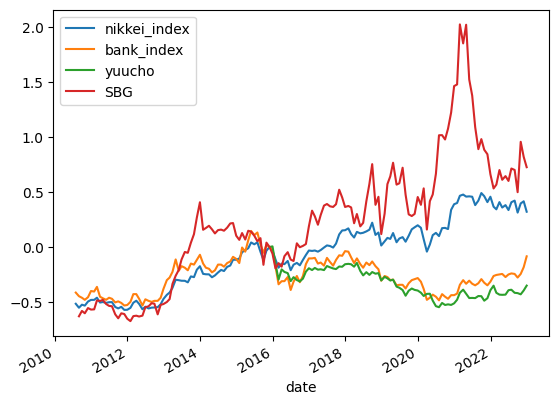

In [4]:
# グラフ化（plt）
df_stock_price_rp0.plot(kind="line")
# グラフ化（px）
# px.line(df_stock_price_rp0, x="day", y="yuucho", color="stock_name", markers=True)
# グラフ化（st）
# st.subheader('株価の変動率の推移（2015年11月30日基準）')
# st.caption("日経平均株価（nikkei_index)")
# st.caption("銀行業インデックス株価（bank_index）")
# st.caption("ゆうちょ銀行株価（yuucho）")
# st.caption("ソフトバンクグループ株価（SBG）")
# st.line_chart(df_stock_price_rp0)

In [5]:
df_stock_price

,nikkei_index,bank_index,yuucho,SBG
date,,,,
2010-07-30,-0.517041,-0.415094,NaN,NaN
2010-08-31,-0.553147,-0.448113,NaN,-0.631273
2010-09-30,-0.525548,-0.462264,NaN,-0.582313
2010-10-29,-0.534005,-0.481132,NaN,-0.603733
2010-11-30,-0.496784,-0.457547,NaN,-0.556304
...,...,...,...,...
2022-08-31,0.422596,-0.245283,-0.417241,0.701958
2022-09-30,0.313465,-0.278302,-0.420115,0.499388
2022-10-31,0.397022,-0.245283,-0.431034,0.958384


In [6]:
# 相関係数
# st.subheader('株価間の相関係数')
# df_stock_price.corr = df_stock_price.corr()
# df_stock_price.corr
df_stock_price.corr()

,nikkei_index,bank_index,yuucho,SBG
nikkei_index,1.000000,0.324938,-0.576956,0.908916
bank_index,0.324938,1.000000,0.846219,0.180952
yuucho,-0.576956,0.846219,1.000000,-0.628321
SBG,0.908916,0.180952,-0.628321,1.000000


不祥事
2019年6月14日：投資信託を不適切販売
2020年9月25日：キャッシュレス決済の不正送金

In [7]:
# ゆうちょfactbook1の読み込み(Income Analysis (Non-consolidated))
df_yuucho_factbook1 = pd.read_csv("yuucho_factbook1.csv", encoding= "utf-8")

# 日付をPandas日付データに変換して昇順にソート
df_yuucho_factbook1["date"] = pd.to_datetime(df_yuucho_factbook1["date"], infer_datetime_format= True)
df_yuucho_factbook1.sort_values(by = "date", ascending = True, inplace = True) 

# dateをインデックスに指定
df_yuucho_factbook1 = df_yuucho_factbook1.set_index("date")
df_yuucho_factbook1

,Gross operating profit,Net interest income,Net fees and commissions,Net other operating income (loss),Gains (losses) on foreign exchanges,Gains (losses) on bonds,General and administrative expenses,Personnel expenses,Non-personnel expenses,Taxes and dues,...,Income taxes - deferred,Total income taxes,Net income,Credit-related expenses,Provision for general reserve for possible loan losses .1,Write-off of loans,Provision for specific reserve for possible loan losses,Recoveries of written-off loans,Net ordinary income.1,Net income attributable to owners of \nparent
date,,,,,,,,,,,,,,,,,,,,,
2015-09-30,759496,699430,46950,13115,7783,5332,-531684,-62245,-431893,-37544,...,5198,-79340,171587,21,21,NaN,NaN,NaN,NaN,NaN
2016-03-31,692586,661635,44189,-13237,-9254,-3486,-534500,-63178,-433276,-38047,...,-8489,-76479,153482,-3,-3,0.0,0.0,0.0,0.0,0.0
2016-09-30,716336,629304,42994,44037,39038,4095,-530999,-63341,-428729,-38928,...,5103,-61150,150973,4,4,NaN,NaN,NaN,NaN,NaN
2017-03-31,693920,594242,43625,56054,60357,-6549,-525169,-61987,-425640,-37542,...,-149,-67182,161291,-4,-4,0.0,0.0,0.0,0.0,0.0
2017-09-30,757756,618062,47127,92566,87779,3042,-522253,-64056,-419629,-38568,...,27,-75115,181555,-5,-5,NaN,NaN,NaN,NaN,NaN
2018-03-31,704611,557629,49321,97661,107151,-9515,-522793,-64602,-419296,-38894,...,27998,-71077,171190,-6,-6,0.0,0.0,0.0,499654.0,352775.0
2018-09-30,720278,549135,52994,118148,132846,-17568,-521976,-63158,-422213,-36604,...,-3052,-63815,159291,6,6,NaN,NaN,NaN,223356.0,159291.0
2019-03-31,606755,466991,53767,85997,86602,5327,-515561,-63202,-419435,-32923,...,-1544,-40198,106887,8,8,0.0,0.0,0.0,150622.0,106898.0
2019-09-30,678294,501840,65490,110963,107860,5370,-514652,-61339,-427615,-25697,...,-862,-56279,144705,12,12,NaN,NaN,NaN,201149.0,144879.0


In [8]:
df_yuucho_factbook1.dtypes

Gross operating profit                                                                int64
Net interest income                                                                   int64
Net fees and commissions                                                              int64
Net other operating income (loss)                                                     int64
Gains (losses) on foreign exchanges                                                   int64
Gains (losses) on bonds                                                               int64
General and administrative expenses                                                   int64
Personnel expenses                                                                    int64
Non-personnel expenses                                                                int64
Taxes and dues                                                                        int64
Operating profit (before provision for general reserve for possible loan losses)

In [9]:
# ゆうちょfactbook2の読み込み(Summarized Balance Sheets (Non-consolidated))
df_yuucho_factbook2 = pd.read_csv("yuucho_factbook2.csv", encoding= "utf-8")

# 日付をPandas日付データに変換して昇順にソート
df_yuucho_factbook2["date"] = pd.to_datetime(df_yuucho_factbook2["date"], infer_datetime_format= True)
df_yuucho_factbook2.sort_values(by = "date", ascending = True, inplace = True) 

# dateをインデックスに指定
df_yuucho_factbook2 = df_yuucho_factbook2.set_index("date")
df_yuucho_factbook2

,Cash and due from banks,Call loans,Receivables under resale agreements,Receivables under securities borrowing transactions,Monetary claims bought,Trading account securities,Money held in trust,Securities,Loans,Foreign exchanges,...,Capital stock,Capital surplus,Retained earnings,Treasury stock,Total shareholders' equity,Net unrealized gains (losses) on available-for-sale securities,Net deferred gains (losses) on hedges,Total valuation and translation adjustments,Total net assets,Total liabilities and net assets
date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,33301050,1961526,-,8374084,122032,104,3491637,156169792,2783985,49332,...,3500000,4296285,1968617,-1299999,8464904,3824643,-659335,3165307,11630212,208179309
2015-09-30,39378850,1830314,-,8058744,124725,173,3479636,149801138,2617649,16118,...,3500000,4296285,1955487,-1299999,8451773,3391783,-635751,2756031,11207805,207232518
2016-03-31,45895068,978837,-,7923229,178509,187,3561110,144076834,2542049,25328,...,3500000,4296285,2108969,-1299999,8605256,3322827,-419932,2902894,11508150,207056039
2016-09-30,47665957,666155,-,8096939,197965,50,3503401,141197568,2720729,33805,...,3500000,4296285,2166206,-1300411,8662080,3103068,-154195,2948873,11610954,207210247
2017-03-31,51281921,470000,-,8718905,252214,9,3817908,138792448,4064120,78646,...,3500000,4296285,2233759,-1300411,8729634,3166980,-116577,3050403,11780037,209568820
2017-09-30,52680595,551273,-,8464850,255429,119,3969430,136412090,4796252,72074,...,3500000,4296285,2321578,-1300717,8817146,3298962,-230118,3068843,11885990,209801010
2018-03-31,49288314,480000,-,8224153,278566,32,4241524,139201254,6145537,87487,...,3500000,4296285,2399031,-1300717,8894599,2615432,3119,2618551,11513151,210630601
2018-09-30,48464755,420000,-,7719159,257978,29,4448964,137759782,6380233,102848,...,3500000,4296285,2464586,-1300926,8959945,2418411,-106430,2311981,11271927,208377817
2019-03-31,50698549,400000,8368139,-,295679,2,3990780,137135264,5297424,80396,...,3500000,4296285,2477736,-1300926,8973095,2440064,-62353,2377710,11350806,208970478


In [10]:
df_yuucho_factbook2.dtypes

Cash and due from banks                                            int64
Call loans                                                         int64
Receivables under resale agreements                               object
Receivables under securities borrowing transactions               object
Monetary claims bought                                             int64
Trading account securities                                         int64
Money held in trust                                                int64
Securities                                                         int64
Loans                                                              int64
Foreign exchanges                                                  int64
Other assets                                                       int64
Tangible fixed assets                                              int64
Intangible fixed assets                                            int64
Deferred tax assets                                

In [11]:
# ゆうちょfactbook4の読み込み(Average Balance, Interest, and Earnings Yield of Interest-Earning Assets and Interest-Bearing Liabilities (Non-consolidated))
df_yuucho_factbook4 = pd.read_csv("yuucho_factbook4.csv", encoding= "utf-8")

# 日付をPandas日付データに変換して昇順にソート
df_yuucho_factbook4["date"] = pd.to_datetime(df_yuucho_factbook4["date"], infer_datetime_format= True)
df_yuucho_factbook4.sort_values(by = "date", ascending = True, inplace = True) 

# dateをインデックスに指定
df_yuucho_factbook4 = df_yuucho_factbook4.set_index("date")
df_yuucho_factbook4

,AverageBalance/Domestic_Interest-earning assets,AverageBalance/Domestic_Loans,AverageBalance/Domestic_Securities,"AverageBalance/Domestic_Due from banks, etc.",AverageBalance/Domestic_Interest-bearing liabilities,AverageBalance/Domestic_Deposits,AverageBalance/Domestic_Payables under securities lending transactions,AverageBalance/Overseas_Interest-earning assets,AverageBalance/Overseas_Loans,AverageBalance/Overseas_Securities,...,Earnings Yield/Total_Loans,Earnings Yield/Total_Securities,"Earnings Yield/Total_Due from banks, etc.",Earnings Yield/Total_Interest-bearing liabilities,Earnings Yield/Total_Deposits,Earnings Yield/Total_Payables under securities lending transactions,Average balance of money held in trust,Average balance corresponding to money held in trust,Corresponding interest,"For investment trusts, the distribution of profits, which was deducted from the book value as the repayment of principal, is indicated in the right-hand table."
date,,,,,,,,,,,,,,,,,,,,,
2015-09-30,192047937,2729117,116727346,34831682,184096604,177712386,8713871,37700302,1929,36599991,...,1,1,0,0,0,0,2349941,2349941,4561,19332
2016-03-31,192120047,2681909,109010368,39310383,184078165,177868069,8650599,40910445,2614,40072765,...,1,1,0,0,0,0,2450837,2450837,4776,61984
2016-09-30,193355723,2528481,95287659,47323916,184383908,178830935,8200442,45803875,3300,45654017,...,1,1,0,0,0,0,2647805,2647805,4745,426
2017-03-31,193991919,3081133,92901349,47723014,184991156,179251855,8385284,48252687,2151,48099311,...,1,1,0,0,0,0,2646250,2646250,4779,900
2017-09-30,194888309,4051668,83794070,53043130,186230810,180189097,8773692,51892842,81,51709631,...,0,1,0,0,0,0,2742475,2742475,4728,4644
2018-03-31,195014321,4765201,82402056,51583059,186524351,180316482,8903813,54248055,2534,54067069,...,0,1,0,0,0,0,2772856,2772856,4725,14461
2018-09-30,194287761,6540168,78738136,49858459,186503726,180944300,8341119,57362740,5000,57245971,...,0,1,0,0,0,1,3005541,3005541,5307,29461
2019-03-31,194710207,6090997,77703674,49543054,187129472,181227650,6057199,59119568,5000,59005163,...,0,1,0,0,0,1,2977608,2977608,5298,80783
2019-09-30,197309717,5063261,73052033,52923230,189969911,182623839,128841,61705949,7131,61590570,...,0,1,0,0,0,2,2977202,2977202,5120,34313


In [12]:
df_yuucho_factbook4.dtypes

AverageBalance/Domestic_Interest-earning assets                                                                                                                    int64
AverageBalance/Domestic_Loans                                                                                                                                      int64
AverageBalance/Domestic_Securities                                                                                                                                 int64
AverageBalance/Domestic_Due from banks, etc.                                                                                                                       int64
AverageBalance/Domestic_Interest-bearing liabilities                                                                                                               int64
                                                                                                                                                           

In [13]:
# # ゆうちょfactbook5の読み込み(Unrealized Gains (Losses) on Financial Instruments (Non-consolidated))
# df_yuucho_factbook5= pd.read_csv("yuucho_factbook4.csv", encoding= "utf-8")

# # 日付をPandas日付データに変換して昇順にソート
# df_yuucho_factbook5["day"] = pd.to_datetime(df_yuucho_factbook5["day"], infer_datetime_format= True)
# df_yuucho_factbook5.sort_values(by = "day", ascending = True, inplace = True) 

# # dayをインデックスに指定
# df_yuucho_factbook5 = df_yuucho_factbook5.set_index("day")
# df_yuucho_factbook5

,Gross operating profit,Net interest income,Net fees and commissions,Net other operating income (loss),Gains (losses) on foreign exchanges,Gains (losses) on bonds,General and administrative expenses,Personnel expenses,Non-personnel expenses,Taxes and dues,...,Total income taxes,Net income,Credit-related expenses,Provision for general reserve for possible loan losses .1,Write-off of loans,Provision for specific reserve for possible loan losses,Recoveries of written-off loans,Net ordinary income.1,Net income attributable to owners of \nparent,Total funds balance
date,,,,,,,,,,,,,,,,,,,,,
2015-09-30,759496,699430,46950,13115,7783,5332,-531684,-62245,-431893,-37544,...,-79340,171587,21,21,0.0,0.0,0.0,0.0,0.0,737566.0
2016-03-31,692586,661635,44189,-13237,-9254,-3486,-534500,-63178,-433276,-38047,...,-76479,153482,-3,-3,0.0,0.0,0.0,0.0,0.0,720968.0
2016-09-30,716336,629304,42994,44037,39038,4095,-530999,-63341,-428729,-38928,...,-61150,150973,4,4,0.0,0.0,0.0,0.0,0.0,697782.0
2017-03-31,693920,594242,43625,56054,60357,-6549,-525169,-61987,-425640,-37542,...,-67182,161291,-4,-4,0.0,0.0,0.0,0.0,0.0,704765.0
2017-09-30,757756,618062,47127,92566,87779,3042,-522253,-64056,-419629,-38568,...,-75115,181555,-5,-5,0.0,0.0,0.0,0.0,0.0,732913.0
2018-03-31,704611,557629,49321,97661,107151,-9515,-522793,-64602,-419296,-38894,...,-71077,171190,-6,-6,0.0,0.0,0.0,499654.0,352775.0,660886.0
2018-09-30,720278,549135,52994,118148,132846,-17568,-521976,-63158,-422213,-36604,...,-63815,159291,6,6,0.0,0.0,0.0,223356.0,159291.0,691282.0
2019-03-31,606755,466991,53767,85997,86602,5327,-515561,-63202,-419435,-32923,...,-40198,106887,8,8,0.0,0.0,0.0,150622.0,106898.0,598235.0
2019-09-30,678294,501840,65490,110963,107860,5370,-514652,-61339,-427615,-25697,...,-56279,144705,12,12,0.0,0.0,0.0,201149.0,144879.0,653552.0


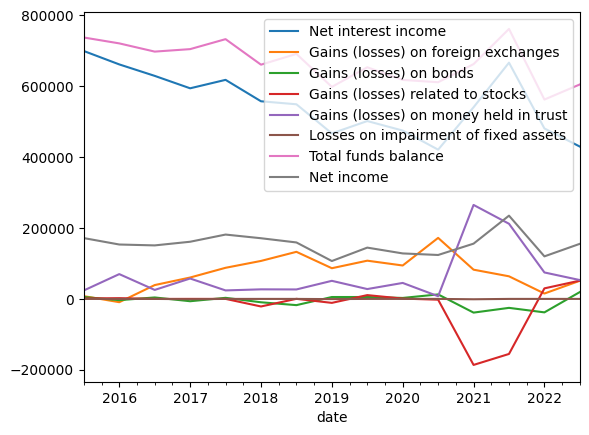

In [14]:
# NaNを0に変換
df_yuucho_factbook1.fillna(0, inplace=True)

# 資金利益、外国為替売買損益、国債等債券損益、株式等関係損益、金銭の信託運用損益、減損損失の合計、当期純利益を表示
df_yuucho_factbook1["Total funds balance"] = df_yuucho_factbook1["Net interest income"] + df_yuucho_factbook1["Gains (losses) on foreign exchanges"]\
+ df_yuucho_factbook1["Gains (losses) on bonds"] + df_yuucho_factbook1["Gains (losses) related to stocks"]\
+ df_yuucho_factbook1["Gains (losses) on money held in trust"] + df_yuucho_factbook1["Losses on impairment of fixed assets"]
df_yuucho_factbook1[["Net interest income", "Gains (losses) on foreign exchanges", "Gains (losses) on bonds", \
                    "Gains (losses) related to stocks", "Gains (losses) on money held in trust", "Losses on impairment of fixed assets",\
                    "Total funds balance", "Net income"]].plot(kind="line")
df_yuucho_factbook1

<AxesSubplot: xlabel='date'>

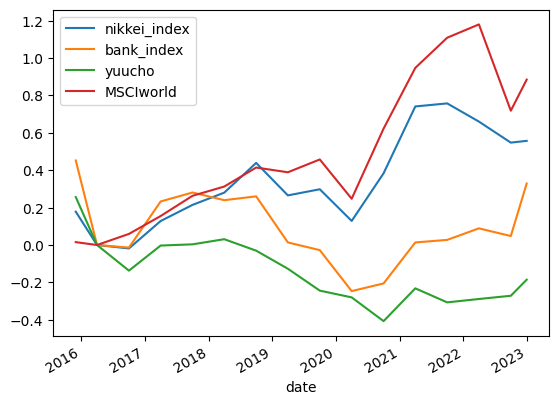

In [15]:
# 日経平均、銀行業、ゆうちょ、MSCIコクサイのcsvファイルの読み込み
df_stock_price_MSCIworld = pd.read_csv("stock_price_MSCIworld.csv", encoding= "utf-8")

# dateをPandas日付データに変換して昇順にソート
df_stock_price_MSCIworld['date'] = pd.to_datetime(df_stock_price_MSCIworld['date'], infer_datetime_format= True)
df_stock_price_MSCIworld.sort_values(by = 'date', ascending = True, inplace = True) 

# # dateをインデックスに指定
df_stock_price_MSCIworld = df_stock_price_MSCIworld.set_index("date")
df_stock_price_MSCIworld
df_stock_price_MSCIworld_rp0 = df_stock_price_MSCIworld

# 2016‐03‐31を基準点（reference point）として株価を100とする
df_stock_price_MSCIworld_rp0["nikkei_index"]  = (df_stock_price_MSCIworld_rp0["nikkei_index"] - 16759) / 16759
df_stock_price_MSCIworld_rp0["bank_index"] = (df_stock_price_MSCIworld_rp0["bank_index"] - 146) / 146
df_stock_price_MSCIworld_rp0["yuucho"] = (df_stock_price_MSCIworld_rp0["yuucho"] - 1385) / 1385
df_stock_price_MSCIworld_rp0["MSCIworld"] = (df_stock_price_MSCIworld_rp0["MSCIworld"] - 7503) / 7503

# df_stock_price_MSCIworld["bank_index"] = df_stock_price_MSCIworld["bank_index"]*(16759 / 146)
# df_stock_price_MSCIworld["yuucho"] = df_stock_price_MSCIworld["yuucho"]*(16759 / 1385)
# df_stock_price_MSCIworld_rp0["MSCIworld"] = df_stock_price_MSCIworld_rp0["MSCIworld"]*(16759 / 7503)

df_stock_price_MSCIworld_rp0.plot(kind="line")

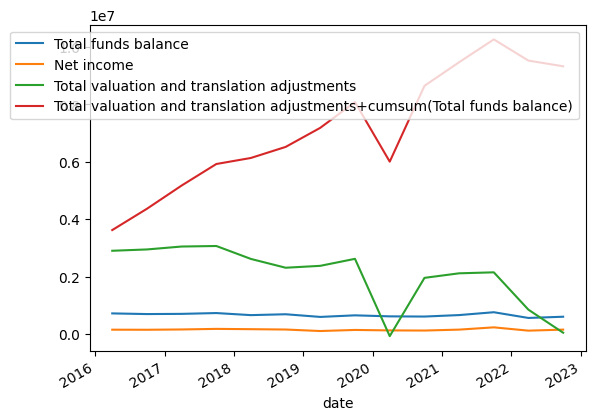

In [16]:
# 分析用に_MSCIworldとdf_yuucho_factbook1とdf_yuucho_factbook2結合
df_analysis1 = df_stock_price_MSCIworld.join(df_yuucho_factbook1)
df_analysis1 = df_analysis1.join(df_yuucho_factbook2)
df_analysis1

# 2016年3月を評価・換算差額等とTotal funds balanceの合計
df_analysis1["Total valuation and translation adjustments+Total funds balance"] = df_analysis1["Total valuation and translation adjustments"] +\
df_analysis1["Total funds balance"]
# df_analysis1["Total valuation and translation adjustments＋Total funds balance"] 

# Total funds balanceの累積和
df_analysis1["cumsum(Total funds balance)"] = df_analysis1["Total funds balance"].cumsum()
df_analysis1["cumsum(Total funds balance)"]

# 2016年3月を評価・換算差額等とcumsum(Total funds balance)の合計
df_analysis1["Total valuation and translation adjustments+cumsum(Total funds balance)"] = df_analysis1["Total valuation and translation adjustments"] +\
df_analysis1["cumsum(Total funds balance)"]

# Total funds balanceとNet incomeと評価・換算差額等合計のみとして、比較表を表示
df_analysis2 = df_analysis1[["Total funds balance", "Net income", "Total valuation and translation adjustments", "Total valuation and translation adjustments+cumsum(Total funds balance)"]]
# df_analysis2.plot.line(subplots=True) 
df_analysis2.plot.line()
plt.show()


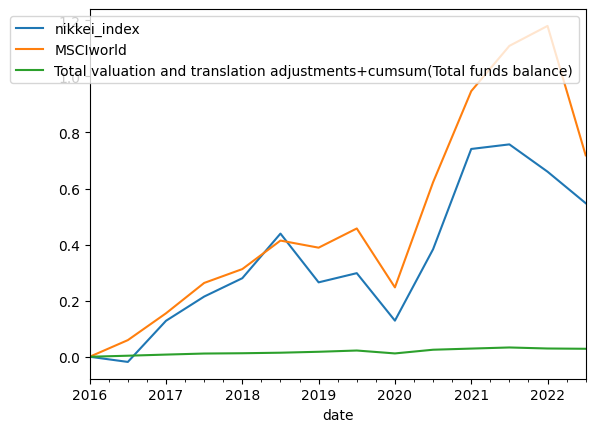

In [17]:
# Total valuation and translation adjustmentsがNaNの行を削除
df_analysis1.dropna(subset=["Total valuation and translation adjustments"], inplace= True)
df_analysis1["Total valuation and translation adjustments"]

# 2016年3月を評価・換算差額等とcumsum(Total funds balance)の合計
df_analysis1["Total valuation and translation adjustments+cumsum(Total funds balance)"] = df_analysis1["Total valuation and translation adjustments"] +\
df_analysis1["cumsum(Total funds balance)"]

# 2016年3月を評価・換算差額等とcumsum(Total funds balance)の合計0として、変化量をみる
df_analysis1["Total valuation and translation adjustments+cumsum(Total funds balance)"] = (df_analysis1["Total valuation and translation adjustments+cumsum(Total funds balance)"] - (2902894 + 720968)) / (200599151) 

# 日経平均と評価・換算差額等合計のみとするとして、比較表を表示
df_analysis1 = df_analysis1[["nikkei_index", "MSCIworld", "Total valuation and translation adjustments+cumsum(Total funds balance)"]]
df_analysis1.plot.line()
plt.show()

In [18]:
df_analysis1.corr()

,nikkei_index,MSCIworld,Total valuation and translation adjustments+cumsum(Total funds balance)
nikkei_index,1.000000,0.959168,0.929681
MSCIworld,0.959168,1.000000,0.945624
Total valuation and translation adjustments+cumsum(Total funds balance),0.929681,0.945624,1.000000


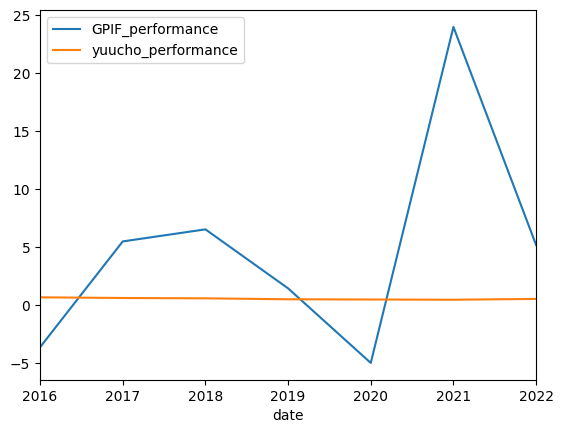

In [19]:
# 日経平均、銀行業、ゆうちょ、MSCIコクサイ、GPIFのcsvファイルの読み込み
df_GPIF_performance = pd.read_csv("GPIF_performance.csv", encoding= "utf-8")

# dateをPandas日付データに変換して昇順にソート
df_GPIF_performance['date'] = pd.to_datetime(df_GPIF_performance['date'], infer_datetime_format= True)
df_GPIF_performance.sort_values(by = 'date', ascending = True, inplace = True) 

# # dateをインデックスに指定
df_GPIF_performance = df_GPIF_performance.set_index("date")
df_GPIF_performance["GPIF_performance"]
# df_GPIF_performance_rp0 = df_GPIF_performance

df_GPIF_performance = df_GPIF_performance[["GPIF_performance", "yuucho_performance"]]
df_GPIF_performance.plot.line()
plt.show()


In [20]:
# 費用分析のcsvファイルの読み込み
df_expense_analysis = pd.read_csv("expense_analysis.csv", encoding= "utf-8")

# dateをPandas日付データに変換して昇順にソート
df_expense_analysis['date'] = pd.to_datetime(df_expense_analysis['date'], infer_datetime_format= True)
df_expense_analysis.sort_values(by = 'date', ascending = True, inplace = True) 

# dateをインデックスに指定
df_expense_analysis = df_expense_analysis.set_index("date")
df_expense_analysis

,General and administrative expenses,G total,deposit insurance,Non-personnel expenses(others),Personnel expenses,Taxes and dues,Non-personnel expenses,Japan Post,Japan Post Holdings,kikou,employee in branch,employee
date,,,,,,,,,,,,
2015-03-31,11136,6213,1036,1925,1220,741,9174,6024,189.0,NaN,5411,18878
2016-03-31,10640,6094,661,1896,1232,755,8651,6094,98.0,NaN,5425,18618
2017-03-31,10540,6124,661,1758,1232,764,8543,6124,83.0,NaN,5531,18382
2018-03-31,10428,5981,298,2110,1264,774,8389,5981,56.0,NaN,5457,17937
2019-03-31,10353,6006,596,1814,1242,695,8416,6006,16.0,NaN,5191,17161
2020-03-31,10183,6075,594,1774,1206,533,8443,3697,NaN,2378.0,4925,16472
2021-03-31,10080,6037,574,1731,1172,565,8342,3663,NaN,2374.0,4303,15933
2022-03-31,9790,5902,553,1735,1151,449,8190,3532,NaN,2370.0,3904,15221


<AxesSubplot: xlabel='date'>

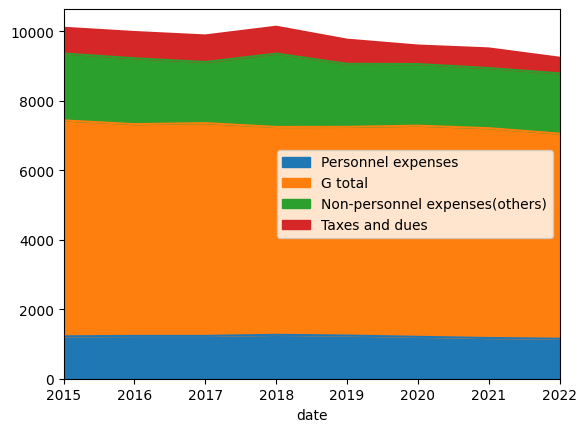

In [21]:
df_expense_analysis[["Personnel expenses","G total", "Non-personnel expenses(others)", "Taxes and dues"]].plot(kind="area")

<AxesSubplot: xlabel='date'>

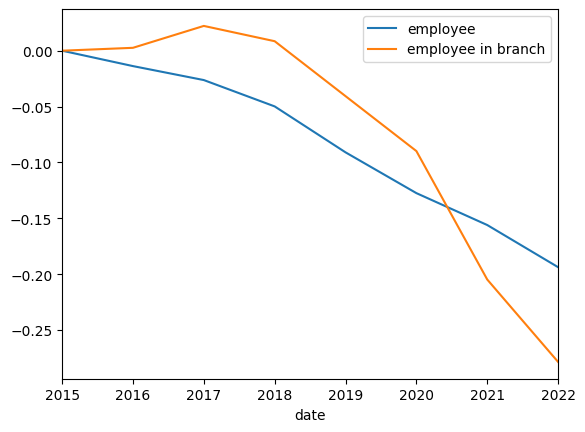

In [22]:
df_expense_analysis["employee"] = (df_expense_analysis["employee"] - 18878) / 18878
df_expense_analysis["employee in branch"] = (df_expense_analysis["employee in branch"] - 5411) / 5411
df_expense_analysis[["employee", "employee in branch"]].plot.line()

<AxesSubplot: xlabel='date'>

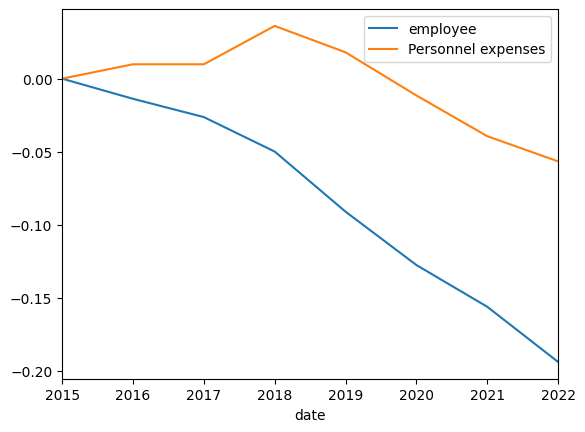

In [23]:
df_expense_analysis["Personnel expenses"] = (df_expense_analysis["Personnel expenses"] - 1220) / 1220 
df_expense_analysis[["employee", "Personnel expenses"]].plot.line()

<AxesSubplot: xlabel='date'>

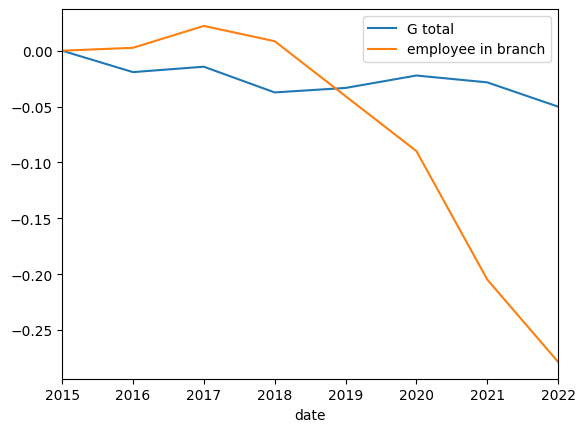

In [24]:

df_expense_analysis["G total"] = (df_expense_analysis["G total"] - 6213) / 6213
df_expense_analysis[["G total", "employee in branch"]].plot(kind="line")

<AxesSubplot: xlabel='date'>

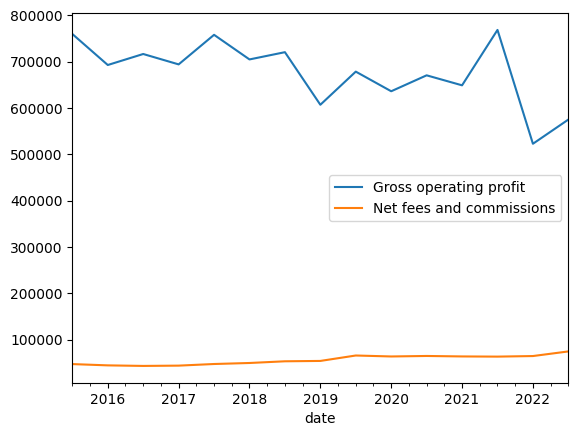

In [25]:
df_yuucho_factbook1[["Gross operating profit","Net fees and commissions"]].plot(kind="line")